# Zomato Data Analysis

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import data
df=pd.read_csv("Zomato data .csv")

In [4]:
#top 5 records
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
#convert the datatype of column - rate
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(handleRate)
print(df)

                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

In [7]:
#check dtypes & null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### 1. Type of Restaurant

Text(0.5, 0, 'Type of Restaurant')

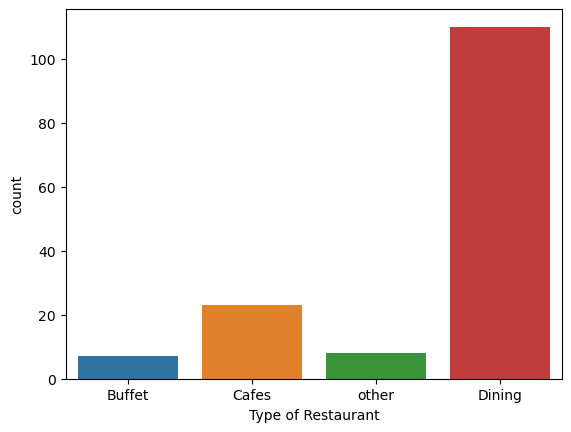

In [8]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Restaurant')

### Conclusion - Majority of customers order food from restaurants of Dining category.

### 2. Votes by type of Restaurant

Text(0, 0.5, 'Votes')

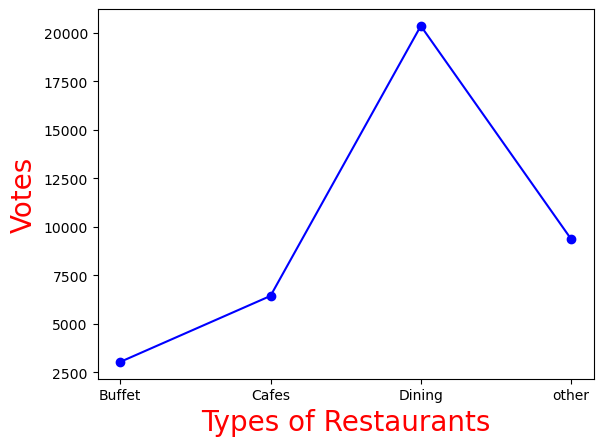

In [14]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='blue',marker='o')
plt.xlabel("Types of Restaurants",c='red',size=20)
plt.ylabel("Votes",c='red',size=20)

### Conclusion - Dining restaurants received the maximum votes.

### 3. Ratings that majority of restaurants have received

<function matplotlib.pyplot.show(close=None, block=None)>

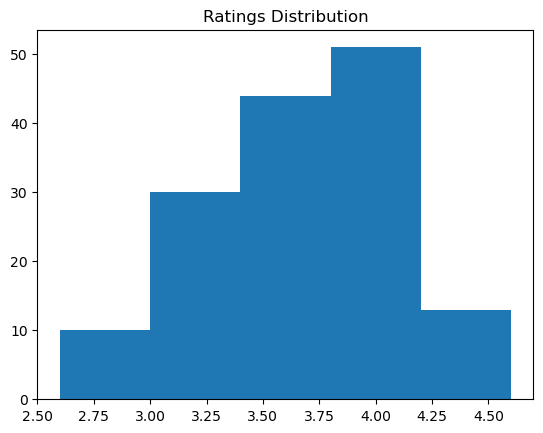

In [15]:
plt.hist(df['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show

### Conclusion - Majority of restaurants received ratings from 3.5 to 4. 

### 4. Average order spending by couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

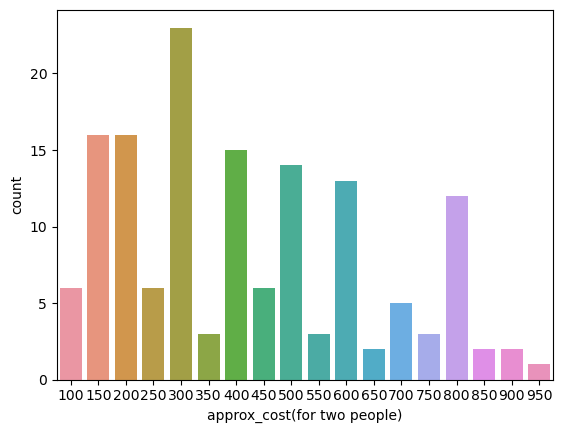

In [16]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

### Conclusion - Max number of couple prefer restaurants with an approx spending of Rs. 300 

### 5. Which mode (online or offline) has received the max rating

<Axes: xlabel='online_order', ylabel='rate'>

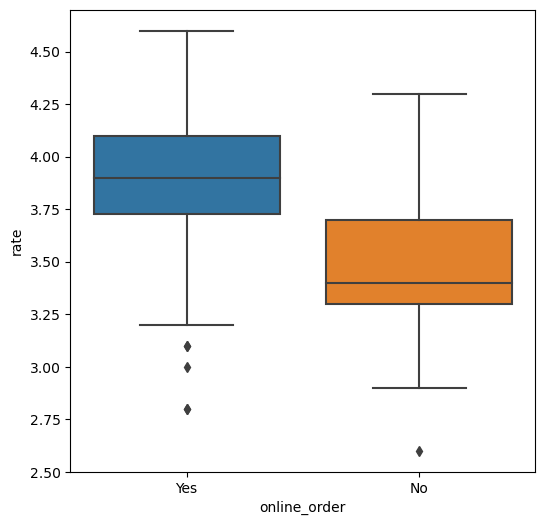

In [17]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

### Conclusion - Offline order received less ratings in compare to Online orders.

### 6. Which type of restaurant received more offline orders 

<function matplotlib.pyplot.show(close=None, block=None)>

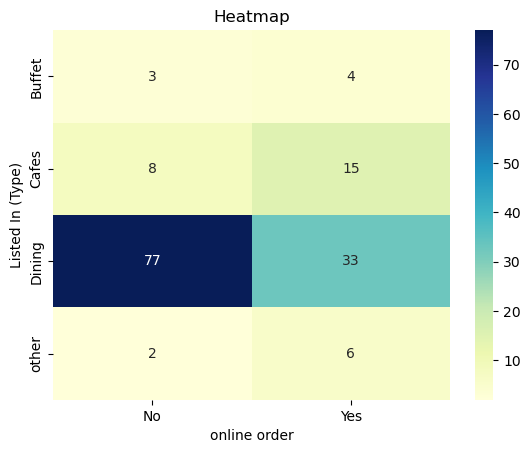

In [18]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xlabel("online order")
plt.ylabel("Listed In (Type)")
plt.show

### Conclusion - Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that customers prefer orders in person at restaurants, but prefer online ordering at cafes. 